In [ ]:
import numpy as np
import tensorflow as tf
import keras
import cv2
from keras.layers import MaxPool2D, Conv2D, UpSampling2D, Input, Dropout
from keras import layers
from keras.models import Sequential
from keras.preprocessing.image import img_to_array
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import re
from tensorflow.keras.utils import to_categorical
from skimage import color

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

In [ ]:
def plot_images(color, grayscale):
    plt.figure(figsize=(15,15))
    plt.subplot(1,3,1)
    plt.title('Color Image', color = 'green', fontsize=20)
    plt.imshow(color)
    plt.subplot(1,3,2)
    plt.title('Grayscale Image', color = 'black', fontsize=20)
    plt.imshow(grayscale, cmap='gray')

    plt.show()

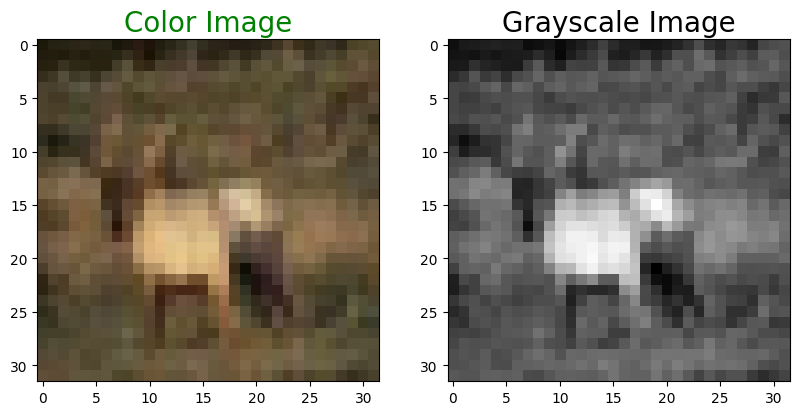

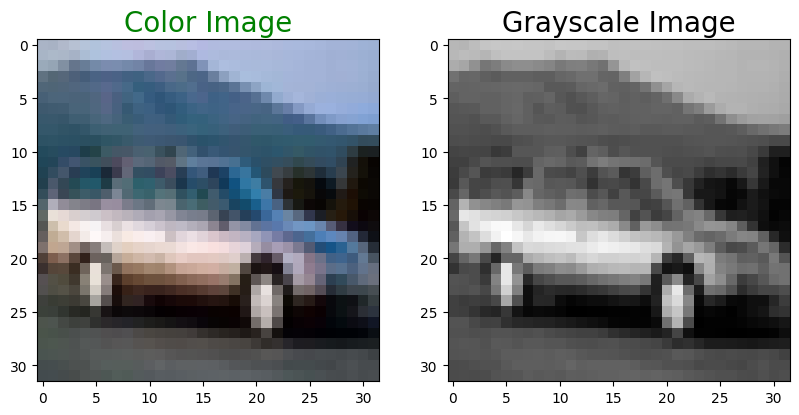

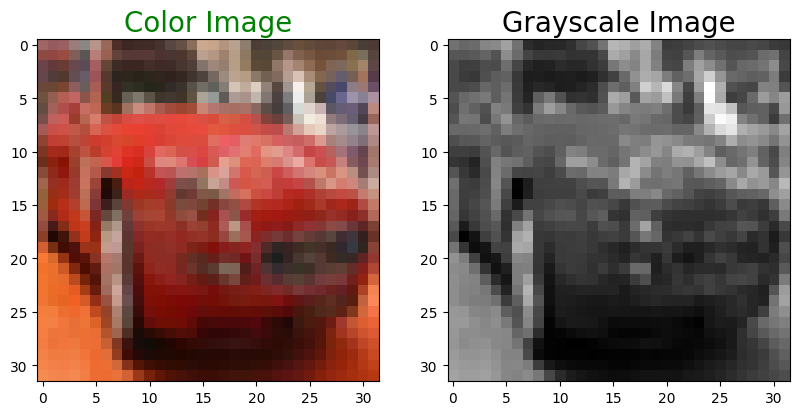

In [ ]:
for i in range(3,6):
  plot_images(x_train[i],color.rgb2gray(x_train[i]))

In [ ]:
def build_CNN():
  model= Sequential(
      [
          Input(shape=(32,32,1)),
          layers.Conv2D(32, kernel_size=(3,3), activation='relu', padding= 'same'),
          layers.MaxPool2D(pool_size=(2,2)),
          layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
          layers.MaxPool2D(pool_size=(2,2)),


          layers.Flatten(),
          layers.Dense(10, activation='softmax')
       ]

  )
  return model

In [ ]:
model= build_CNN()
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 32, 32, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │        31,370 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,186 (196.04 KB)

 Trainable params: 50,186 (196.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
grey_xtrain= color.rgb2gray(x_train)
ytrain_cat= to_categorical(y_train)

grey_xtrain= grey_xtrain / 255
grey_xtrain= np.expand_dims(grey_xtrain, axis=-1)

grey_xtrain.shape

(50000, 32, 32, 1)

In [ ]:
model.fit(grey_xtrain, ytrain_cat, epochs=5, batch_size=128, validation_split= 0.1)

Epoch 1/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.1144 - loss: 2.2945 - val_accuracy: 0.2318 - val_loss: 2.1431
Epoch 2/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.2329 - loss: 2.1329 - val_accuracy: 0.2490 - val_loss: 2.0813
Epoch 3/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.2720 - loss: 2.0645 - val_accuracy: 0.2978 - val_loss: 2.0227
Epoch 4/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2996 - loss: 2.0111 - val_accuracy: 0.3202 - val_loss: 1.9704
Epoch 5/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3166 - loss: 1.9598 - val_accuracy: 0.3258 - val_loss: 1.9323
